In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

yellowknife ca
illoqqortoormiut gl
rikitea pf
halalo wf
bredasdorp za
saint-philippe re
tigil ru
chokurdakh ru
tasiilaq gl
port elizabeth za
hermanus za
ushuaia ar
bengkulu id
esperance au
shiyan cn
cabo san lucas mx
hermanus za
kodiak us
kaitangata nz
ushuaia ar
saint-philippe re
tignere cm
punta arenas cl
bida ng
mount isa au
punta arenas cl
hilo us
punta arenas cl
geraldton au
narsaq gl
bathsheba bb
busselton au
umzimvubu za
qaanaaq gl
scarborough tt
arraial do cabo br
lolua tv
kapaa us
kalmunai lk
maarianhamina fi
yellowknife ca
lyngseidet no
kristiinankaupunki fi
bilma ne
lagoa pt
rikitea pf
khatanga ru
jamestown sh
bluff nz
corinto ni
margate za
port elizabeth za
boa vista br
mataura pf
port alfred za
vardo no
illoqqortoormiut gl
teahupoo pf
faanui pf
mandalgovi mn
amderma ru
tuatapere nz
barrow us
syracuse it
bredasdorp za
otavi na
mehamn no
busselton au
maymyo mm
zelenoborsk ru
husavik is
holt us
san patricio mx
jamestown sh
langxiang cn
semey kz
kapaa us
mataura pf
cabo san lu

mahibadhoo mv
marietta us
hilo us
belushya guba ru
saskylakh ru
sorland no
mataura pf
vostok ru
bouake ci
rikitea pf
samana do
albany au
khatanga ru
iqaluit ca
castro cl
khatanga ru
otane nz
nikolskoye ru
dunedin nz
flin flon ca
illoqqortoormiut gl
jamestown sh
utiroa ki
bokoro td
eyl so
angoche mz
alakurtti ru
rikitea pf
sitka us
omboue ga
severo-kurilsk ru
busselton au
albany au
namibe ao
belushya guba ru
vaitupu wf
punta arenas cl
ushuaia ar
rikitea pf
disna by
maragogi br
nizhnyaya pavlovka ru
punta arenas cl
lithakia gr
new norfolk au
hualmay pe
porto novo cv
ulladulla au
padang id
port-cartier ca
pandan ph
kampot kh
vaini to
saldanha za
kampene cd
beidao cn
puerto ayora ec
kapaa us
amderma ru
plettenberg bay za
mackay au
coihaique cl
avarua ck
kijang id
shenjiamen cn
half moon bay us
ushuaia ar
lalsot in
ulaangom mn
sinnamary gf
mataura pf
punta arenas cl
port alfred za
bluff nz
amderma ru
kibungo rw
punta arenas cl
airai pw
uricani ro
salinopolis br
port keats au
talikota in
hig

nikolskoye ru
bibiani gh
busselton au
kutoarjo id
kapaa us
albany au
barrow us
point fortin tt
severo-kurilsk ru
saint george bm
atuona pf
dabakala ci
thompson ca
hambantota lk
bur gabo so
provideniya ru
cape town za
mataura pf
ilulissat gl
illoqqortoormiut gl
oksovskiy ru
taksimo ru
margate za
kapaa us


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [25]:
import requests

from config import weather_api_key

In [26]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [27]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [28]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [29]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | halalo
City not found. Skipping...
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | tigil
Processing Record 8 of Set 1 | chokurdakh
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | bengkulu
Processing Record 14 of Set 1 | esperance
Processing Record 15 of Set 1 | shiyan
Processing Record 16 of Set 1 | cabo san lucas
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | kaitangata
Processing Record 19 of Set 1 | tignere
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | bida
Processing Record 22 of Set 1 | mount isa
Processing Record 23 of Se

Processing Record 41 of Set 4 | along
Processing Record 42 of Set 4 | mata
Processing Record 43 of Set 4 | turbat
Processing Record 44 of Set 4 | anadyr
Processing Record 45 of Set 4 | kiama
Processing Record 46 of Set 4 | zhezkazgan
Processing Record 47 of Set 4 | hasaki
Processing Record 48 of Set 4 | bubaque
Processing Record 49 of Set 4 | cortez
Processing Record 50 of Set 4 | tilichiki
Processing Record 1 of Set 5 | gumdag
Processing Record 2 of Set 5 | banda aceh
Processing Record 3 of Set 5 | longyearbyen
Processing Record 4 of Set 5 | pevek
Processing Record 5 of Set 5 | sandur
Processing Record 6 of Set 5 | leningradskiy
Processing Record 7 of Set 5 | virginia beach
Processing Record 8 of Set 5 | oussouye
Processing Record 9 of Set 5 | iqaluit
Processing Record 10 of Set 5 | damietta
Processing Record 11 of Set 5 | mahibadhoo
Processing Record 12 of Set 5 | huangzhai
Processing Record 13 of Set 5 | mahebourg
Processing Record 14 of Set 5 | srednekolymsk
Processing Record 15 of

City not found. Skipping...
Processing Record 35 of Set 8 | lithakia
Processing Record 36 of Set 8 | hualmay
Processing Record 37 of Set 8 | ulladulla
Processing Record 38 of Set 8 | port-cartier
Processing Record 39 of Set 8 | kampot
Processing Record 40 of Set 8 | kampene
Processing Record 41 of Set 8 | beidao
Processing Record 42 of Set 8 | mackay
Processing Record 43 of Set 8 | coihaique
Processing Record 44 of Set 8 | kijang
Processing Record 45 of Set 8 | shenjiamen
Processing Record 46 of Set 8 | lalsot
Processing Record 47 of Set 8 | ulaangom
Processing Record 48 of Set 8 | kibungo
Processing Record 49 of Set 8 | uricani
Processing Record 50 of Set 8 | port keats
Processing Record 1 of Set 9 | talikota
Processing Record 2 of Set 9 | high prairie
Processing Record 3 of Set 9 | pitimbu
Processing Record 4 of Set 9 | pulwama
Processing Record 5 of Set 9 | black river
Processing Record 6 of Set 9 | lake city
Processing Record 7 of Set 9 | santa marta
Processing Record 8 of Set 9 | 

City not found. Skipping...
Processing Record 24 of Set 12 | gorodishche
Processing Record 25 of Set 12 | imatra
Processing Record 26 of Set 12 | baruun-urt
Processing Record 27 of Set 12 | san andres
Processing Record 28 of Set 12 | rafraf
Processing Record 29 of Set 12 | naryan-mar
Processing Record 30 of Set 12 | uozu
Processing Record 31 of Set 12 | dakar
Processing Record 32 of Set 12 | sungai siput utara
City not found. Skipping...
Processing Record 33 of Set 12 | makat
Processing Record 34 of Set 12 | itarema
Processing Record 35 of Set 12 | poronaysk
Processing Record 36 of Set 12 | kemijarvi
Processing Record 37 of Set 12 | bandarbeyla
Processing Record 38 of Set 12 | wulanhaote
City not found. Skipping...
Processing Record 39 of Set 12 | laguna
Processing Record 40 of Set 12 | clyde
Processing Record 41 of Set 12 | alta floresta
Processing Record 42 of Set 12 | chala
Processing Record 43 of Set 12 | cap malheureux
Processing Record 44 of Set 12 | aklavik
Processing Record 45 

In [34]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 22 of Set 13 | yellowknife
Processing Record 23 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 24 of Set 13 | rikitea
Processing Record 25 of Set 13 | halalo
City not found. Skipping...
Processing Record 26 of Set 13 | bredasdorp
Processing Record 27 of Set 13 | saint-philippe
Processing Record 28 of Set 13 | tigil
Processing Record 29 of Set 13 | chokurdakh
Processing Record 30 of Set 13 | tasiilaq
Processing Record 31 of Set 13 | port elizabeth
Processing Record 32 of Set 13 | hermanus
Processing Record 33 of Set 13 | ushuaia
Processing Record 34 of Set 13 | bengkulu
Processing Record 35 of Set 13 | esperance
Processing Record 36 of Set 13 | shiyan
Processing Record 37 of Set 13 | cabo san lucas
Processing Record 38 of Set 13 | kodiak
Processing Record 39 of Set 13 | kaitangata
Processing Record 40 of Set 13 | tignere
Processing Record 41 of Set 13 | punta arenas
Processing Record 42 of Set 13 | bida
Processing Record 43 of Set 13 | mount

Processing Record 35 of Set 16 | belgrade
Processing Record 36 of Set 16 | port hardy
Processing Record 37 of Set 16 | kokstad
Processing Record 38 of Set 16 | puerto ayora
Processing Record 39 of Set 16 | tuktoyaktuk
Processing Record 40 of Set 16 | ribeira grande
Processing Record 41 of Set 16 | along
Processing Record 42 of Set 16 | mata
Processing Record 43 of Set 16 | turbat
Processing Record 44 of Set 16 | anadyr
Processing Record 45 of Set 16 | kiama
Processing Record 46 of Set 16 | zhezkazgan
Processing Record 47 of Set 16 | hasaki
Processing Record 48 of Set 16 | bubaque
Processing Record 49 of Set 16 | cortez
Processing Record 50 of Set 16 | tilichiki
Processing Record 1 of Set 17 | gumdag
Processing Record 2 of Set 17 | banda aceh
Processing Record 3 of Set 17 | longyearbyen
Processing Record 4 of Set 17 | pevek
Processing Record 5 of Set 17 | sandur
Processing Record 6 of Set 17 | leningradskiy
Processing Record 7 of Set 17 | virginia beach
Processing Record 8 of Set 17 | o

Processing Record 23 of Set 20 | flin flon
Processing Record 24 of Set 20 | utiroa
City not found. Skipping...
Processing Record 25 of Set 20 | bokoro
Processing Record 26 of Set 20 | eyl
Processing Record 27 of Set 20 | angoche
Processing Record 28 of Set 20 | alakurtti
Processing Record 29 of Set 20 | sitka
Processing Record 30 of Set 20 | omboue
Processing Record 31 of Set 20 | namibe
Processing Record 32 of Set 20 | disna
Processing Record 33 of Set 20 | maragogi
Processing Record 34 of Set 20 | nizhnyaya pavlovka
City not found. Skipping...
Processing Record 35 of Set 20 | lithakia
Processing Record 36 of Set 20 | hualmay
Processing Record 37 of Set 20 | ulladulla
Processing Record 38 of Set 20 | port-cartier
Processing Record 39 of Set 20 | kampot
Processing Record 40 of Set 20 | kampene
Processing Record 41 of Set 20 | beidao
Processing Record 42 of Set 20 | mackay
Processing Record 43 of Set 20 | coihaique
Processing Record 44 of Set 20 | kijang
Processing Record 45 of Set 20 |

Processing Record 11 of Set 24 | tumannyy
City not found. Skipping...
Processing Record 12 of Set 24 | atlantic city
Processing Record 13 of Set 24 | sotnikovo
Processing Record 14 of Set 24 | byron bay
Processing Record 15 of Set 24 | malakal
Processing Record 16 of Set 24 | kasongo-lunda
Processing Record 17 of Set 24 | gazanjyk
Processing Record 18 of Set 24 | phan thiet
Processing Record 19 of Set 24 | provost
Processing Record 20 of Set 24 | pamyat parizhskoy kommuny
Processing Record 21 of Set 24 | dalian
Processing Record 22 of Set 24 | gejiu
Processing Record 23 of Set 24 | meyungs
City not found. Skipping...
Processing Record 24 of Set 24 | gorodishche
Processing Record 25 of Set 24 | imatra
Processing Record 26 of Set 24 | baruun-urt
Processing Record 27 of Set 24 | san andres
Processing Record 28 of Set 24 | rafraf
Processing Record 29 of Set 24 | naryan-mar
Processing Record 30 of Set 24 | uozu
Processing Record 31 of Set 24 | dakar
Processing Record 32 of Set 24 | sungai s

In [84]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.46,-114.35,8.01,84,90,9.17,CA,2020-11-26 20:21:54
1,Rikitea,-23.12,-134.97,75.34,81,100,12.55,PF,2020-11-26 20:21:55
2,Bredasdorp,-34.53,20.04,55.40,71,4,4.70,ZA,2020-11-26 20:21:55
3,Saint-Philippe,-21.36,55.77,73.40,83,52,4.70,RE,2020-11-26 20:21:55
4,Tigil,57.80,158.67,16.02,97,100,6.17,RU,2020-11-26 20:21:55
5,Chokurdakh,70.63,147.92,8.33,95,100,15.01,RU,2020-11-26 20:21:55
6,Tasiilaq,65.61,-37.64,23.07,79,100,18.92,GL,2020-11-26 20:21:55
7,Port Elizabeth,-33.92,25.57,62.60,67,40,9.17,ZA,2020-11-26 20:21:55
8,Hermanus,-34.42,19.23,55.99,77,9,1.01,ZA,2020-11-26 20:21:55
9,Ushuaia,-54.80,-68.30,51.80,53,40,9.17,AR,2020-11-26 20:21:01


In [90]:
#reorder coloums
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2020-11-26 20:21:54,62.46,-114.35,8.01,84,90,9.17
1,Rikitea,PF,2020-11-26 20:21:55,-23.12,-134.97,75.34,81,100,12.55
2,Bredasdorp,ZA,2020-11-26 20:21:55,-34.53,20.04,55.40,71,4,4.70
3,Saint-Philippe,RE,2020-11-26 20:21:55,-21.36,55.77,73.40,83,52,4.70
4,Tigil,RU,2020-11-26 20:21:55,57.80,158.67,16.02,97,100,6.17
5,Chokurdakh,RU,2020-11-26 20:21:55,70.63,147.92,8.33,95,100,15.01
6,Tasiilaq,GL,2020-11-26 20:21:55,65.61,-37.64,23.07,79,100,18.92
7,Port Elizabeth,ZA,2020-11-26 20:21:55,-33.92,25.57,62.60,67,40,9.17
8,Hermanus,ZA,2020-11-26 20:21:55,-34.42,19.23,55.99,77,9,1.01
9,Ushuaia,AR,2020-11-26 20:21:01,-54.80,-68.30,51.80,53,40,9.17


In [92]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [85]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

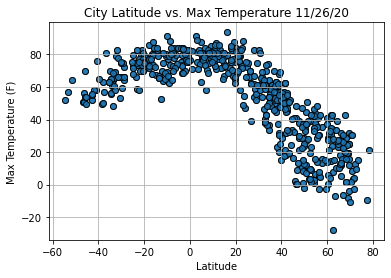

In [86]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

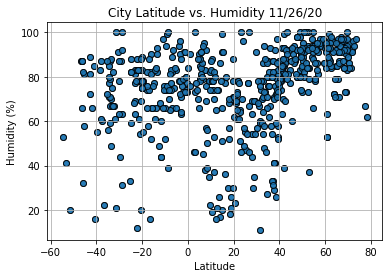

In [87]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

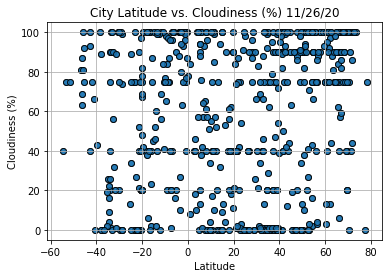

In [88]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

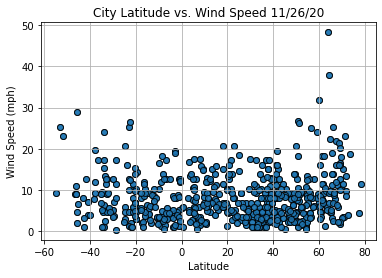

In [89]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [93]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [94]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]


In [95]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [96]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

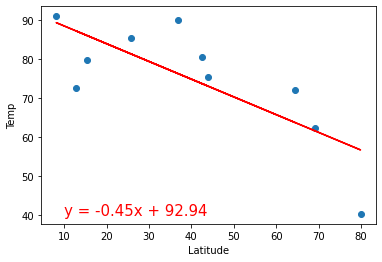

In [97]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

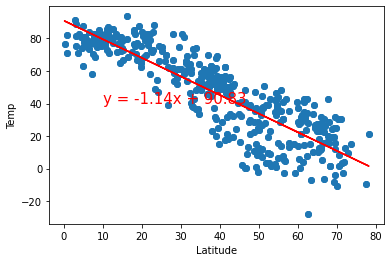

In [107]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()


In [108]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [110]:
index13 = city_data_df.loc[13]
index13

City               Cabo San Lucas
Country                        MX
Date          2020-11-26 20:21:56
Lat                         22.89
Lng                       -109.91
Max Temp                       84
Humidity                       65
Cloudiness                     75
Wind Speed                   8.05
Name: 13, dtype: object

In [111]:
city_data_df["Lat"] >= 0

0        True
1       False
2       False
3       False
4        True
        ...  
1143     True
1144     True
1145     True
1146     True
1147     True
Name: Lat, Length: 1148, dtype: bool

In [113]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2020-11-26 20:21:54,62.46,-114.35,8.01,84,90,9.17
4,Tigil,RU,2020-11-26 20:21:55,57.80,158.67,16.02,97,100,6.17
5,Chokurdakh,RU,2020-11-26 20:21:55,70.63,147.92,8.33,95,100,15.01
6,Tasiilaq,GL,2020-11-26 20:21:55,65.61,-37.64,23.07,79,100,18.92
12,Shiyan,CN,2020-11-26 20:21:56,32.65,110.78,40.48,86,46,1.01


In [114]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

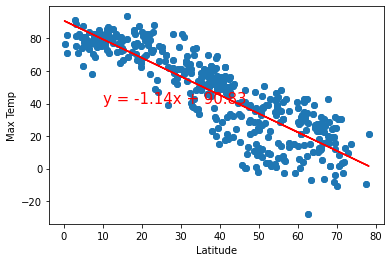

In [115]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

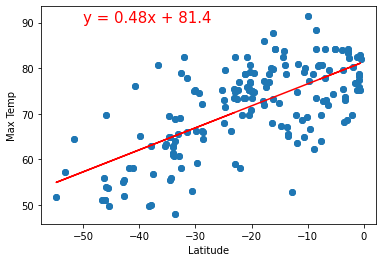

In [116]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

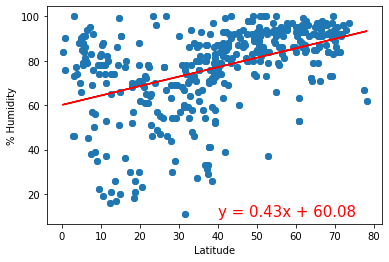

In [117]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

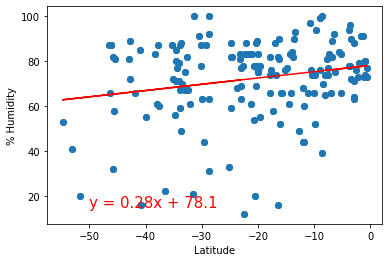

In [120]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

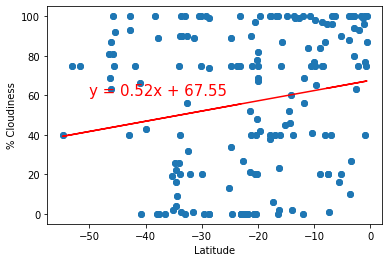

In [122]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

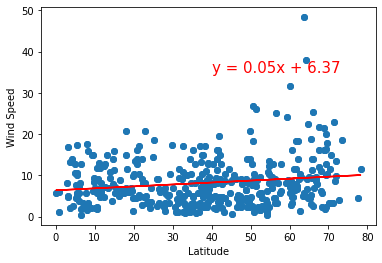

In [124]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

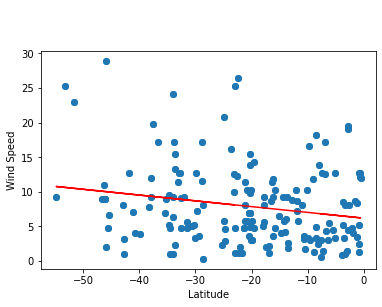

In [126]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
